In [1]:
import pandas as pd

In [2]:
des = pd.read_excel('./테이블명세서_초등이탈.xlsx')

In [3]:
print(des['변수명'])

0                    proc_ymd
1                      userid
2                       mcode
3                completed_yn
4         completed_yn_origin
5     assessment_completed_yn
6          media_completed_yn
7        system_learning_time
8       caliper_learning_time
9               subcontent_nm
10                restart_cnt
11               playtime_sum
12                      score
13                   item_cnt
14               quizcode_cnt
15                correct_cnt
16            solved_time_sum
17            solved_time_avg
18               media_action
19             non_video_view
20                video_start
21              video_restart
22                video_pause
23                 video_jump
24               video_resume
25                video_speed
26               video_volume
27                  video_end
28                    sect_cd
29                  gender_cd
30                    step_cd
31                   grade_cd
32                      grade
33        

In [4]:
print(des['타입'])

0     varchar
1     varchar
2     varchar
3     varchar
4     varchar
5     varchar
6     varchar
7      bigint
8      bigint
9     varchar
10     bigint
11     bigint
12     bigint
13     bigint
14     bigint
15     bigint
16     bigint
17     double
18     bigint
19     bigint
20     bigint
21     bigint
22     bigint
23     bigint
24     bigint
25     bigint
26     bigint
27     bigint
28    varchar
29    varchar
30    varchar
31    varchar
32    varchar
33    varchar
34    varchar
35    varchar
36    varchar
37    varchar
38    varchar
39     bigint
40    varchar
41     bigint
42    varchar
Name: 타입, dtype: object


In [5]:
print(des['변수설명'])

0                        년월일
1                     회원고유ID
2            콘텐츠고유ID (mcode)
3                      완료 여부
4                  완료 여부(원천)
5                  완료 여부(평가)
6                 완료 여부(미디어)
7                 학습 시간(시스템)
8                 학습 시간(캘리퍼)
9                 마지막 콘텐츠 단계
10                 학습 재시작 횟수
11         차시 학습 내 콘텐츠 사용 시간
12                     평가 점수
13                  풀이 문항 개수
14                  퀴즈 코드 개수
15                  정답 문항 개수
16               문항 풀이 시간 합계
17            문항 풀이 시간 계산 평균
18                 미디어 학습 횟수
19                비미디어 활동 횟수
20                 비디오 시작 횟수
21                비디오 재시작 횟수
22               비디오 일시정지 횟수
23                 비디오 점프 횟수
24         비디오 재개(일시정지 후) 횟수
25              비디오 속도 조절 횟수
26              비디오 볼륨 조절 횟수
27                 비디오 종료 횟수
28                      사업구분
29                     학습생성별
30                     학습생단계
31    학년구분코드; 회원(고객)의 학년구분코드
32                      학년구분
33                    상품유형코드
34            

In [6]:
print(des['sample'])

0                                 20221019
1     0015ba98-7e03-4b9c-8ca5-45d7bd58f2f9
2                             T0KE42U04004
3                                        Y
4                                        Y
5                                        Y
6                                        Y
7                                      277
8                                      321
9                                     기본문제
10                                       1
11                                     262
12                                      40
13                                       5
14                                       5
15                                       2
16                                      78
17                                    15.6
18                                      16
19                                       8
20                                       2
21                                       0
22                                       1
23         

In [7]:
df1 = pd.read_csv('./member.csv',encoding='cp949').drop('Unnamed: 0',axis=1)
df2 = pd.read_csv('./learning_time.csv',encoding='cp949').drop('Unnamed: 0',axis=1)
df3 = pd.read_csv('./learning_action.csv',encoding='cp949').drop('Unnamed: 0',axis=1)

In [8]:
print(df1.head()) # id 순서대로 안되어있음 
print(df2.head())
print(df3.head())

                                 userid sect_cd gender_cd step_cd grade  \
0  777f81e8-c221-4771-9d77-f053e9252ed8      초등         남   유료학습생  초3학년   
1  91745902-cd00-4e9d-910e-d4f3101adf21      초등         남   유료학습생  초6학년   
2  88efda5e-cd2e-4b7b-8a06-7b0acb67a884      초등         여   유료학습생  초2학년   
3  b1d5bfed-00a5-4f9f-b3e5-d7a07f272850      초등         남   유료학습생  초5학년   
4  2eb9a149-90e1-4ef3-85f7-90553d15d125      초등         남   유료학습생  초4학년   

  grade_cd  Target  re_purch  
0     G013      10     False  
1     G016      10      True  
2     G012      30     False  
3     G015      10      True  
4     G014      10     False  
   proc_ymd                                userid mcode completed_yn  \
0  20230526  1382f041-8f81-49ec-ae87-f5bc95423f0e    미술            Y   
1  20230523  0eef2d1b-2b02-41f7-aa54-7a90a686f090    국사            Y   
2  20230508  135c9268-c57e-47d9-8780-4f7eb3a945e4    사회            Y   
3  20230508  0bd59bfd-53aa-4b73-bcdf-07e718521cc9    체육            Y   
4  

In [9]:
print(len(df1))
print(len(pd.DataFrame.merge(df1,df2,on='userid',how='inner')))

500
503


In [10]:
new_df = pd.DataFrame.merge(df1,df2,on='userid',how='left')
import numpy as np

dupli = np.where(new_df.duplicated(subset=['userid']))
new_df = new_df.drop(index=dupli[0])

In [11]:
new_df = new_df.reset_index().drop('index',axis=1)

In [12]:
#print(new_df)
result_df = pd.DataFrame.merge(new_df,df3,on='userid',how='left')
print(len(result_df))

500


In [13]:
def change_target(data):
    if data == 10:
        data = 0
    else:
        data = 1
    return data
result_df['Target'] = result_df['Target'].apply(lambda x : change_target(x))
print(result_df.isna().sum())
result_df['system_learning_time'] = result_df['system_learning_time'].fillna(result_df['system_learning_time'].mean())
result_df['restart_cnt'] = result_df['restart_cnt'].fillna(result_df['restart_cnt'].value_counts().argmax())
result_df['score'] = result_df['score'].fillna(result_df['score'].mean())
result_df['item_cnt'] = result_df['item_cnt'].fillna(result_df['item_cnt'].value_counts().argmax())
result_df['quizcode_cnt'] = result_df['quizcode_cnt'].fillna(result_df['quizcode_cnt'].value_counts().argmax())
result_df['correct_cnt'] = result_df['correct_cnt'].fillna(result_df['correct_cnt'].value_counts().argmax())
result_df['solved_time_avg'] = result_df['solved_time_avg'].fillna(result_df['solved_time_avg'].mean())

from sklearn.model_selection import train_test_split


userid                       0
sect_cd                      0
gender_cd                    0
step_cd                      0
grade                        0
grade_cd                     0
Target                       0
re_purch                     0
proc_ymd_x                   0
mcode                        0
completed_yn                14
assessment_completed_yn      5
media_completed_yn           8
system_learning_time        48
restart_cnt                 30
playtime_sum               500
score                        6
item_cnt                    24
quizcode_cnt                44
correct_cnt                 44
solved_time_sum             79
solved_time_avg             80
proc_ymd_y                   0
media_action                 0
non_video_view               0
video_start                  0
video_restart                0
video_pause                  0
video_jump                   0
video_resume                 0
video_speed                  0
video_volume                 0
video_en

0      0
1      0
2      1
3      0
4      0
      ..
495    0
496    0
497    0
498    1
499    0
Name: Target, Length: 500, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

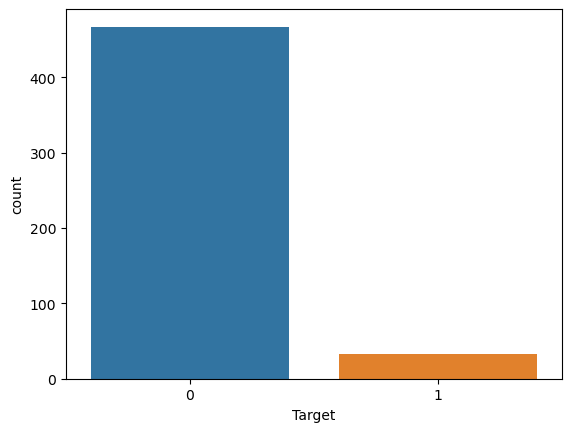

In [14]:
print(result_df['Target'])
import seaborn as sns

sns.countplot(result_df,x='Target')

In [15]:
# 맞춰주기 전에 전처리/ 다른 값 EDA

def changeyn(data):
    if data == 'Y':
        data = 1
    else:
        data = 0
    return data
yn_list = ['completed_yn','assessment_completed_yn','media_completed_yn']
for i in yn_list:
    result_df[i] = result_df[i].apply(lambda x : changeyn(x))


In [16]:
print(result_df.dtypes)
#sect_cd -> 초등하나만 존재함 drop
#gender_cd -> 남/여/정보없음
#step_cd -> 유료/만료
#grade -> 1학년,,, 6학년 굳이 할거면 원핫인코딩
#grade_cd -> 위와 동일 drop
#re_purch -> T/F 
#proc_ymd_x -> 년월일 모든 데이터 5월 흠~
#mcode -> 콘텐츠 고유아이디 국사 과학 .... 확인필요
#system_learning_time -> 학습시간 전부 다 다름
#restart_cnt -> 학습 재시작 횟수 -> 다양함
#playtime_sum -> all nan drop
#score -> 평가 점수
#item_cnt -> 문제 푼 숫자
#quizcode_cnt -> 퀴즈 코드 갯수
#correct_cnt -> 정답 갯수
#문제풀이시간 합계 drop (평균만 사용)
#proc_ymd_y drop
#media_action -> media 학습횟수
#non_video_view -> 비미디어 학습횟수
#video_start -> 비디오 시작횟수
#video_restart -> 비미어 재시작 횟수
#video_pause -> 비디오 정지횟수
#video_jump -> 비디오 점프
#video_resume -> 비디오 시작
#video_spped -> 속도 조절
#video_volumn -> 비디오 볼륨조절

userid                      object
sect_cd                     object
gender_cd                   object
step_cd                     object
grade                       object
grade_cd                    object
Target                       int64
re_purch                      bool
proc_ymd_x                   int64
mcode                       object
completed_yn                 int64
assessment_completed_yn      int64
media_completed_yn           int64
system_learning_time       float64
restart_cnt                float64
playtime_sum               float64
score                      float64
item_cnt                   float64
quizcode_cnt               float64
correct_cnt                float64
solved_time_sum            float64
solved_time_avg            float64
proc_ymd_y                   int64
media_action                 int64
non_video_view               int64
video_start                  int64
video_restart                int64
video_pause                  int64
video_jump          

[0 2 3 1 4 6 5]


<Axes: xlabel='non_video_view', ylabel='count'>

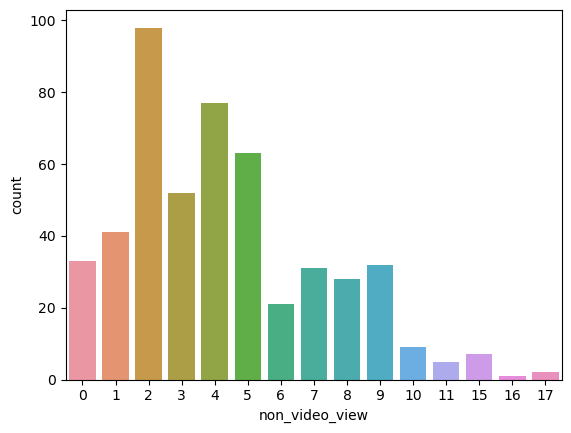

In [17]:
print(result_df['video_start'].unique())
sns.countplot(result_df,x='non_video_view') #video start를 보면 가장 많은 숫자가 0인 것을 알 수 있음, video ~ 데이터는 사용하지 않고 모델링
#video를 시청한 학생들만 빼서 video 데이터 가지고 모델링

In [18]:
drop_list = ['sect_cd','grade_cd','proc_ymd_x','playtime_sum','solved_time_sum','proc_ymd_y']
non_video_data = result_df.drop(drop_list,axis=1)


Index(['userid', 'gender_cd', 'step_cd', 'grade', 'Target', 're_purch',
       'mcode', 'completed_yn', 'assessment_completed_yn',
       'media_completed_yn', 'system_learning_time', 'restart_cnt', 'score',
       'item_cnt', 'quizcode_cnt', 'correct_cnt', 'solved_time_avg',
       'media_action', 'non_video_view', 'video_start', 'video_restart',
       'video_pause', 'video_jump', 'video_resume', 'video_speed',
       'video_volume', 'video_end'],
      dtype='object')


<Axes: xlabel='step_cd', ylabel='count'>

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from curr

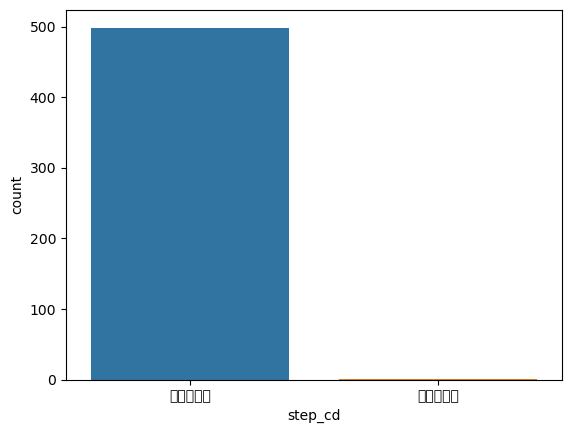

In [19]:
print(non_video_data.columns)
#gender_cd -> 남/여/정보없음
#step_cd -> 유료/만료 
#grade -> 1학년,,, 6학년 굳이 할거면 원핫인코딩
#re_purch -> T/F 
#mcode -> 콘텐츠 고유아이디 국사 과학 .... 확인필요
#system_learning_time -> 학습시간 전부 다 다름
#restart_cnt -> 학습 재시작 횟수 -> 다양함
#score -> 평가 점수
#item_cnt -> 문제 푼 숫자
#quizcode_cnt -> 퀴즈 코드 갯수
#correct_cnt -> 정답 갯수
#media_action -> media 학습횟수
#non_video_view -> 비미디어 학습횟수

sns.countplot(non_video_data,x='step_cd') # 비율 완전 망 -> drop


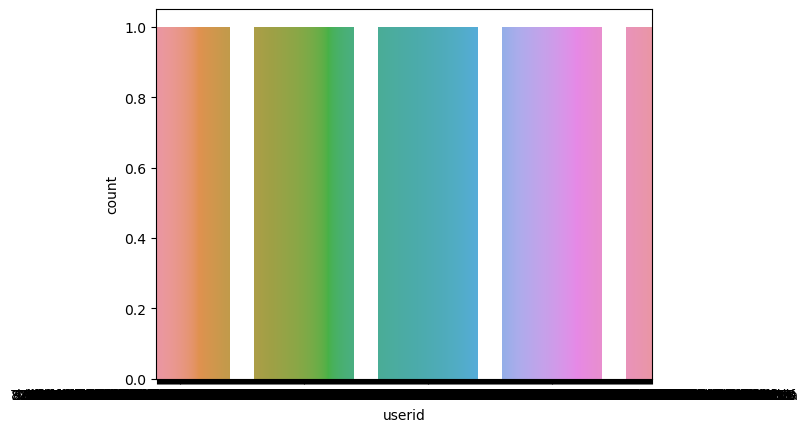

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda

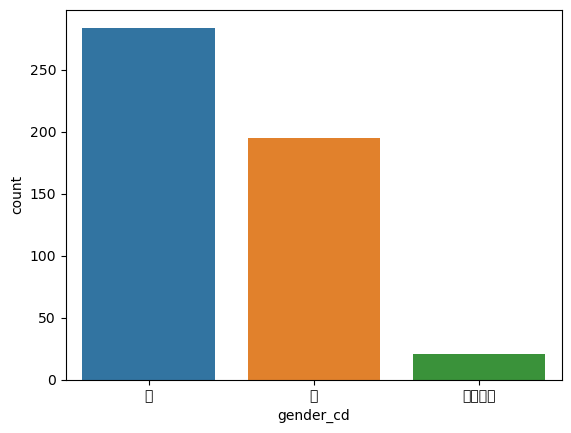

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda

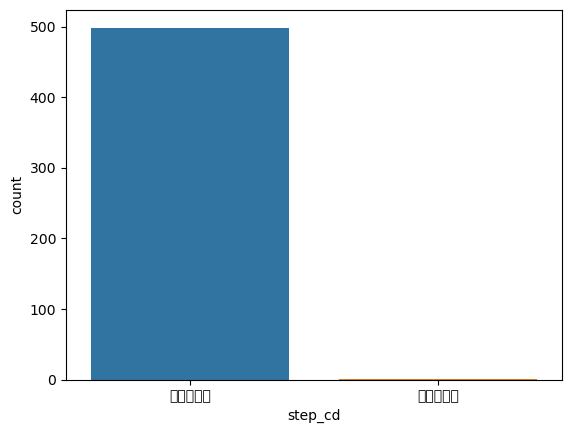

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


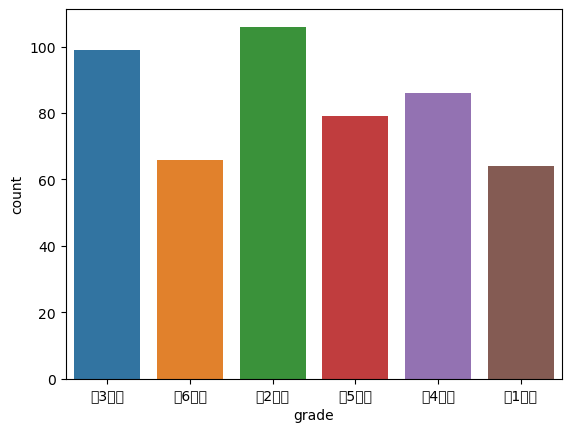

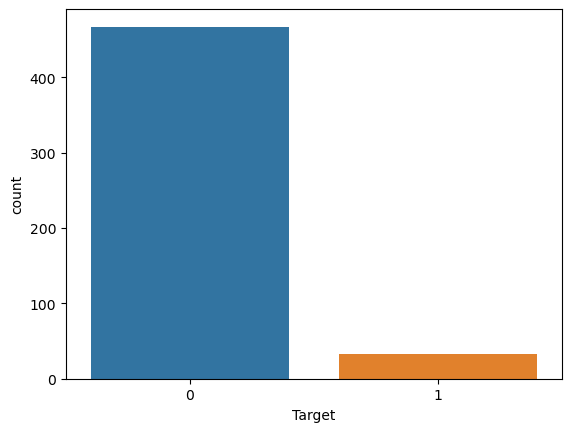

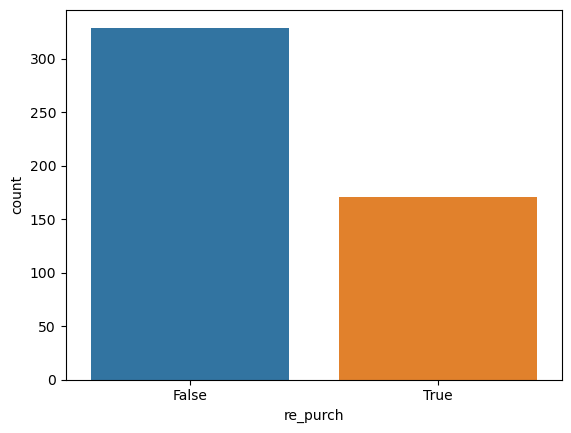

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Li

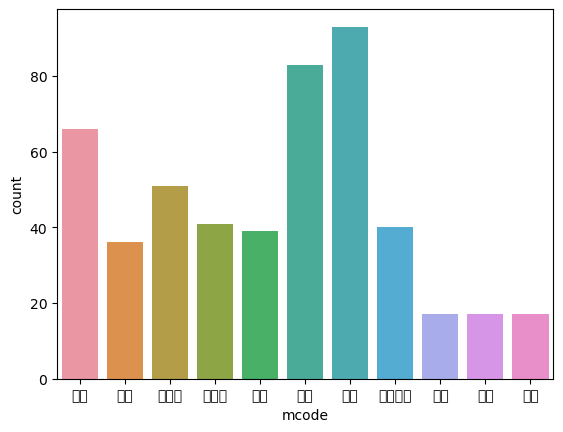

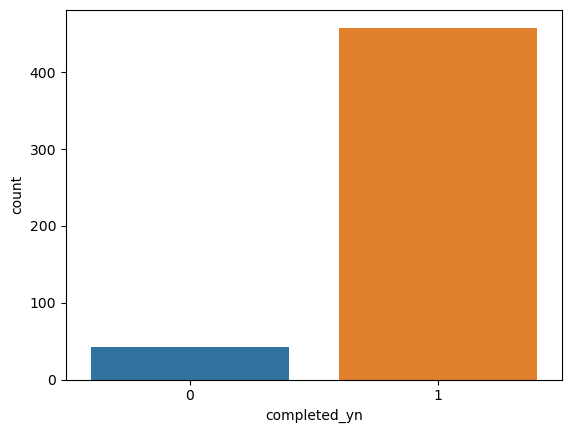

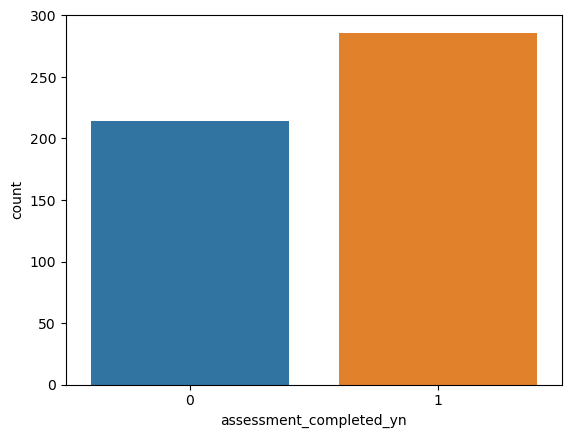

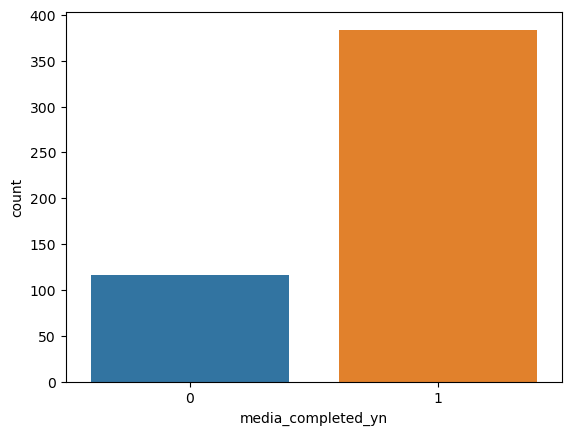

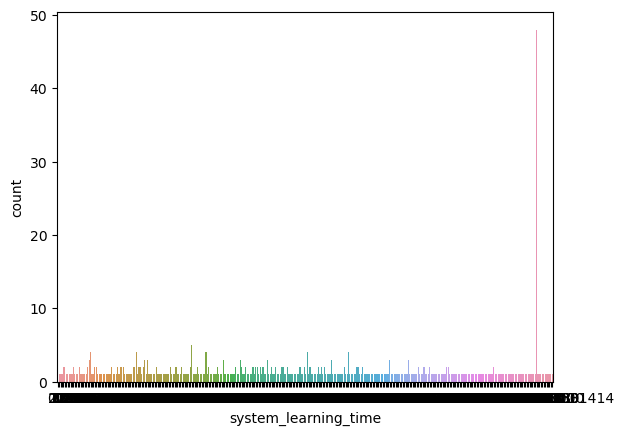

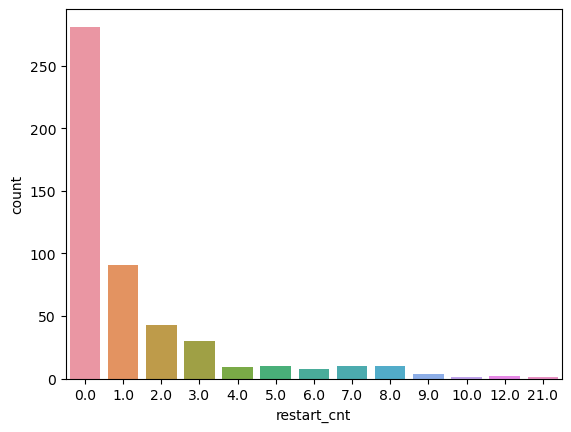

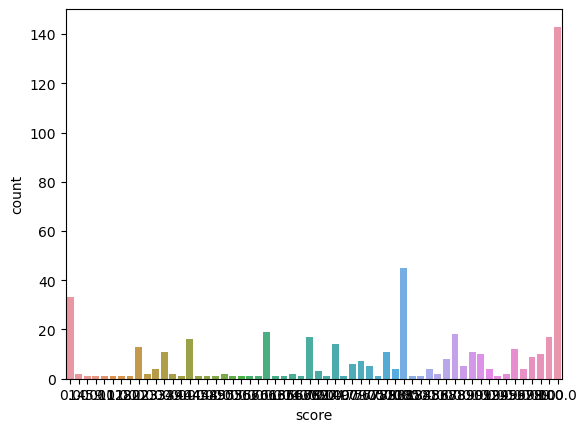

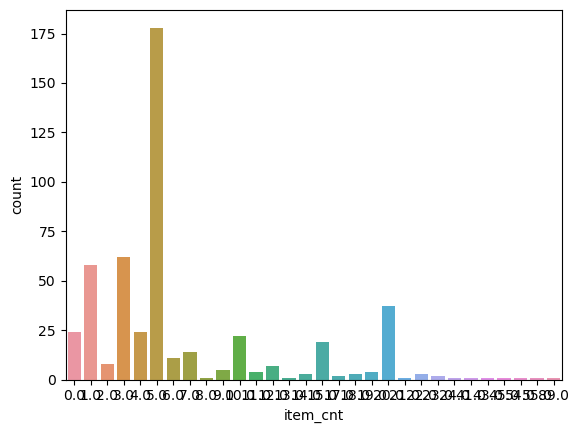

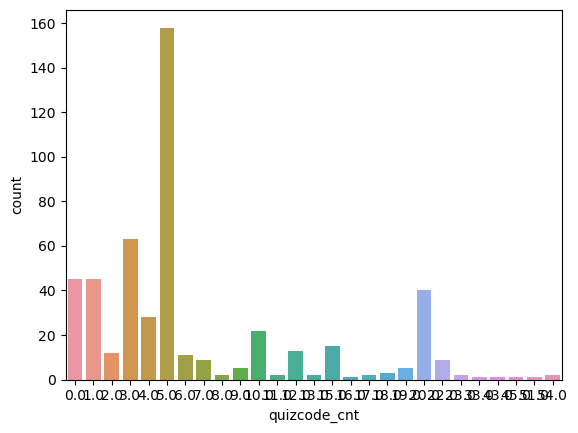

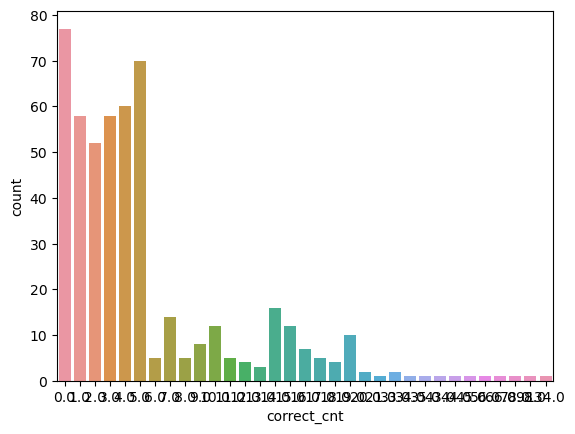

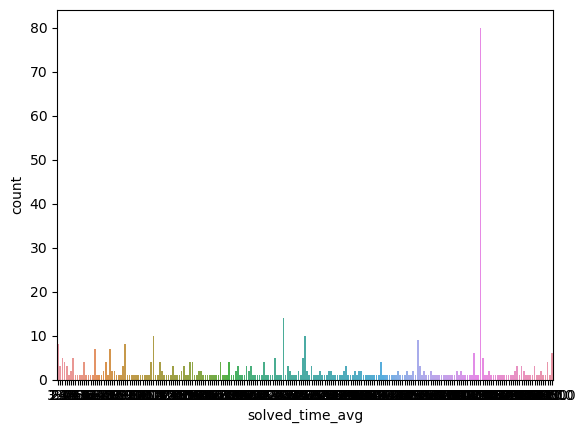

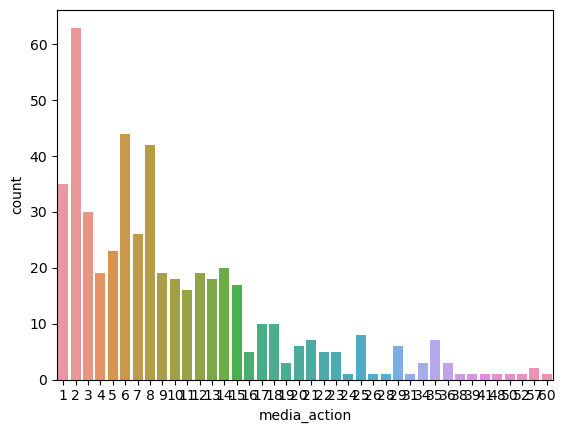

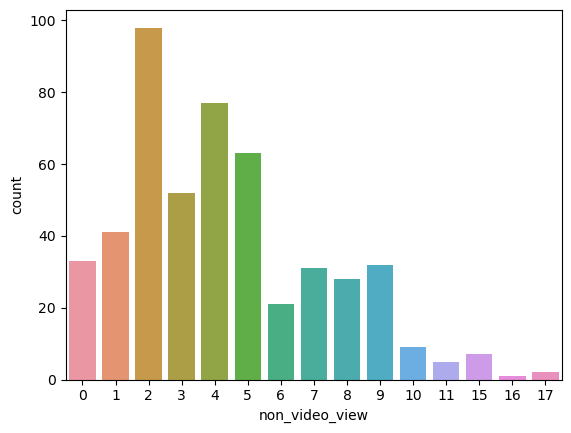

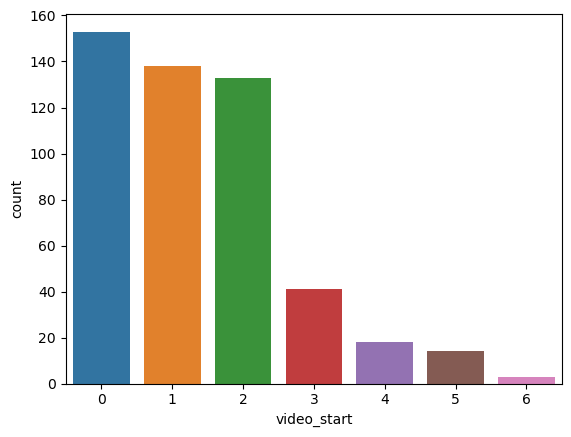

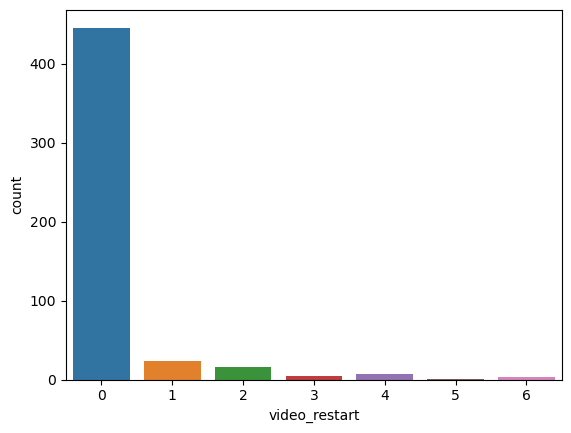

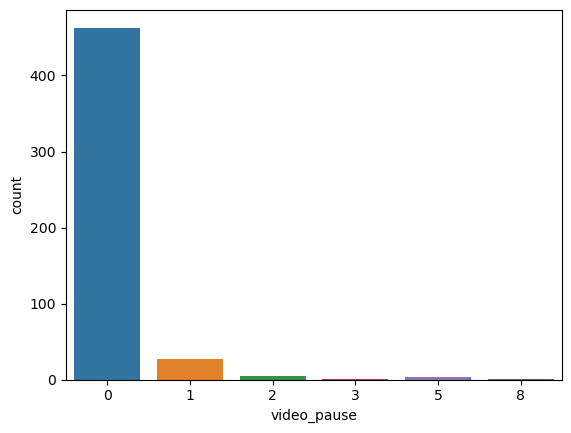

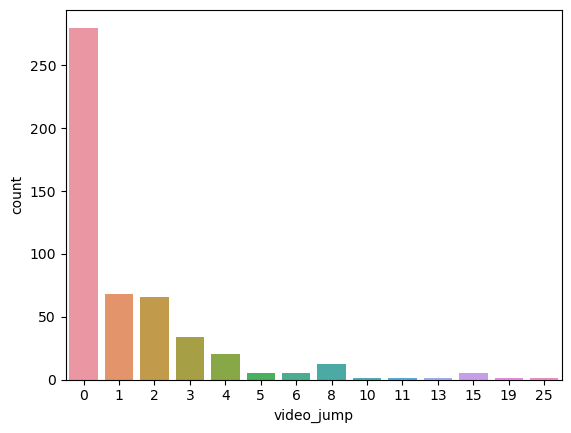

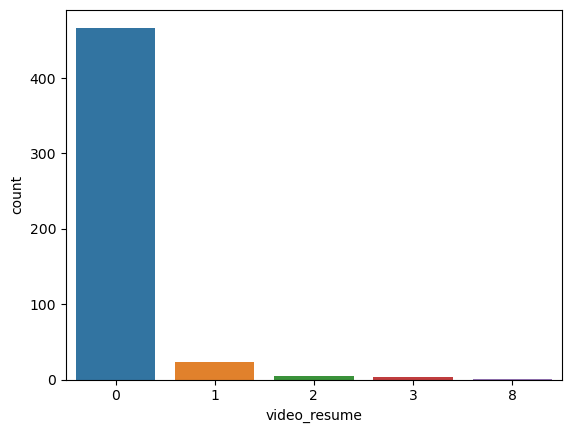

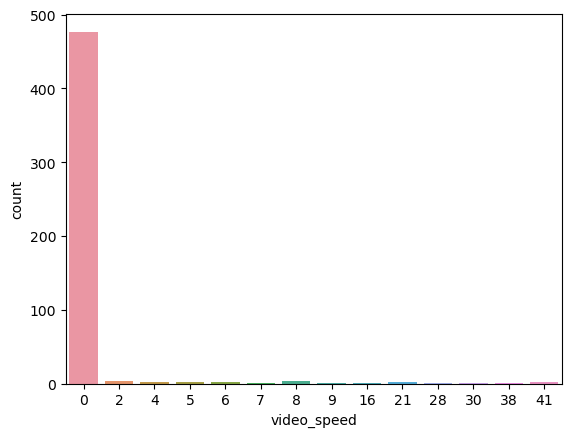

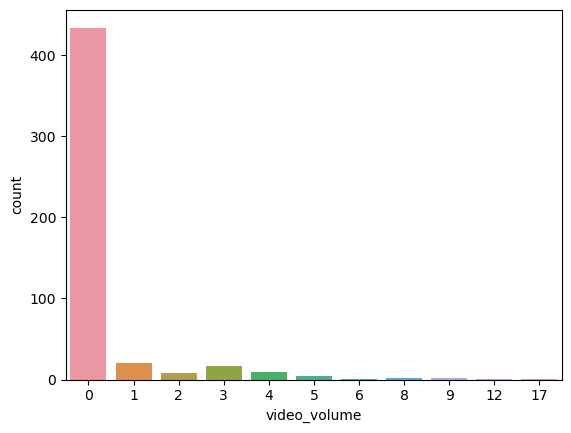

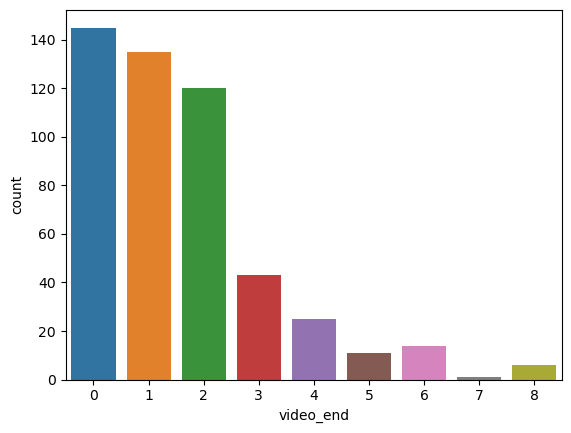

In [20]:
#gender_cd -> 남/여/정보없음
#grade -> 1학년,,, 6학년 굳이 할거면 원핫인코딩
#re_purch -> T/F 
#mcode -> 콘텐츠 고유아이디 국사 과학 .... 확인필요
#system_learning_time -> 학습시간 전부 다 다름
#restart_cnt -> 학습 재시작 횟수 -> 다양함
#score -> 평가 점수
#item_cnt -> 문제 푼 숫자
#quizcode_cnt -> 퀴즈 코드 갯수
#correct_cnt -> 정답 갯수
#media_action -> media 학습횟수
#non_video_view -> 비미디어 학습횟수
import matplotlib.pyplot as plt
col_list = non_video_data.columns
for i in col_list:
    sns.countplot(non_video_data,x=i) 
    plt.show()

In [21]:
#gender_cd -> 남/여/정보없음
#grade -> 1학년,,, 6학년 굳이 할거면 원핫인코딩
#re_purch -> T/F 
#mcode -> 콘텐츠 고유아이디 국사 과학 .... 확인필요
#system_learning_time -> 학습시간 전부 다 다름
#restart_cnt -> 학습 재시작 횟수 -> 다양함
#score -> 평가 점수
#item_cnt -> 문제 푼 숫자
#quizcode_cnt -> 퀴즈 코드 갯수
#correct_cnt -> 정답 갯수
#media_action -> media 학습횟수
#non_video_view -> 비미디어 학습횟수
non_video_data = non_video_data.drop(['completed_yn','video_restart','video_pause','video_jump','video_resume','video_volume'],axis=1)


In [22]:
print(non_video_data.columns)
print(non_video_data['gender_cd'].value_counts())
def gender(data):
    if data == '정보없음':
        data = '여'
    return data
non_video_data['gender_cd'] = non_video_data['gender_cd'].apply(lambda x : gender(x))


Index(['userid', 'gender_cd', 'step_cd', 'grade', 'Target', 're_purch',
       'mcode', 'assessment_completed_yn', 'media_completed_yn',
       'system_learning_time', 'restart_cnt', 'score', 'item_cnt',
       'quizcode_cnt', 'correct_cnt', 'solved_time_avg', 'media_action',
       'non_video_view', 'video_start', 'video_speed', 'video_end'],
      dtype='object')
gender_cd
남       284
여       195
정보없음     21
Name: count, dtype: int64


In [23]:
one_hot = pd.get_dummies(non_video_data['gender_cd'],dtype=int)
print(one_hot)
one_hot2 = pd.get_dummies(non_video_data['re_purch'],dtype=int)
print(one_hot2)
preprocess_df = pd.concat([non_video_data,pd.concat([one_hot,one_hot2],axis=1)],axis=1)


     남  여
0    1  0
1    1  0
2    0  1
3    1  0
4    1  0
..  .. ..
495  0  1
496  0  1
497  1  0
498  1  0
499  0  1

[500 rows x 2 columns]
     False  True 
0        1      0
1        0      1
2        1      0
3        0      1
4        1      0
..     ...    ...
495      1      0
496      0      1
497      1      0
498      1      0
499      1      0

[500 rows x 2 columns]


In [24]:
print(preprocess_df['grade'].unique()) # Ordinary encoding
print(preprocess_df['mcode'].unique()) # one-hot encoding
preprocess_df['grade'] = preprocess_df['grade'].apply(lambda x : int(x[1]))

one_hot = pd.get_dummies(preprocess_df['mcode'],dtype=int)
preprocess_df = pd.concat([preprocess_df,one_hot],axis=1)



['초3학년' '초6학년' '초2학년' '초5학년' '초4학년' '초1학년']
['국사' '과학' '일본어' '중국어' '수학' '체육' '국어' '기술가정' '도덕' '사회' '미술']


In [25]:

drop_list = ['gender_cd','mcode','re_purch']
preprocess_df = preprocess_df.drop(drop_list,axis=1)
print(preprocess_df.columns)

Index([                 'userid',                 'step_cd',
                         'grade',                  'Target',
       'assessment_completed_yn',      'media_completed_yn',
          'system_learning_time',             'restart_cnt',
                         'score',                'item_cnt',
                  'quizcode_cnt',             'correct_cnt',
               'solved_time_avg',            'media_action',
                'non_video_view',             'video_start',
                   'video_speed',               'video_end',
                             '남',                       '여',
                           False,                      True,
                            '과학',                      '국사',
                            '국어',                    '기술가정',
                            '도덕',                      '미술',
                            '사회',                      '수학',
                           '일본어',                     '중국어',
                        

In [26]:
preprocess_df = preprocess_df.drop(['step_cd','userid'],axis=1)


In [27]:
print(preprocess_df.dtypes)

grade                        int64
Target                       int64
assessment_completed_yn      int64
media_completed_yn           int64
system_learning_time       float64
restart_cnt                float64
score                      float64
item_cnt                   float64
quizcode_cnt               float64
correct_cnt                float64
solved_time_avg            float64
media_action                 int64
non_video_view               int64
video_start                  int64
video_speed                  int64
video_end                    int64
남                            int32
여                            int32
False                        int32
True                         int32
과학                           int32
국사                           int32
국어                           int32
기술가정                         int32
도덕                           int32
미술                           int32
사회                           int32
수학                           int32
일본어                 

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print(preprocess_df.columns)
scale_list = []
for i in preprocess_df.columns:
    if i == '남':
        break
    
    scale_list.append(i)
print(scale_list)

Index([                  'grade',                  'Target',
       'assessment_completed_yn',      'media_completed_yn',
          'system_learning_time',             'restart_cnt',
                         'score',                'item_cnt',
                  'quizcode_cnt',             'correct_cnt',
               'solved_time_avg',            'media_action',
                'non_video_view',             'video_start',
                   'video_speed',               'video_end',
                             '남',                       '여',
                           False,                      True,
                            '과학',                      '국사',
                            '국어',                    '기술가정',
                            '도덕',                      '미술',
                            '사회',                      '수학',
                           '일본어',                     '중국어',
                            '체육'],
      dtype='object')
['grade', 'Target', 'assessm

In [31]:
preprocess_df['tt'] = preprocess_df[True]
preprocess_df['ff'] = preprocess_df[False]

preprocess_df = preprocess_df.drop([True,False],axis=1)

In [33]:
print(preprocess_df.describe())

            grade      Target  assessment_completed_yn  media_completed_yn  \
count  500.000000  500.000000               500.000000          500.000000   
mean     3.416000    0.066000                 0.572000            0.768000   
std      1.596258    0.248531                 0.495284            0.422532   
min      1.000000    0.000000                 0.000000            0.000000   
25%      2.000000    0.000000                 0.000000            1.000000   
50%      3.000000    0.000000                 1.000000            1.000000   
75%      5.000000    0.000000                 1.000000            1.000000   
max      6.000000    1.000000                 1.000000            1.000000   

       system_learning_time  restart_cnt       score    item_cnt  \
count            500.000000   500.000000  500.000000  500.000000   
mean            2091.756637     1.284000   74.791498    7.078000   
std            23625.883049     2.314748   30.427335    7.938385   
min                0.0000

In [36]:
preprocess_df[scale_list] = scaler.fit_transform(preprocess_df[scale_list])

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over,y_train_over = smote.fit_resample(preprocess_df.drop('Target',axis=1),preprocess_df['Target'])



In [39]:
preprocess_df = pd.concat([X_train_over,y_train_over],axis=1)
train, test = train_test_split(preprocess_df,test_size=0.3,random_state=42)


In [40]:
train_target = train['Target']
train_feat = train.drop('Target',axis=1)
test_target = test['Target']
test_feat = test.drop('Target',axis=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42,max_depth=3)

randomforest.fit(train_feat,train_target)
acc = randomforest.score(train_feat,train_target)
print(acc) 

0.888208269525268


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 

pred_rfc = randomforest.predict(test_feat)

accuracy_rfc = accuracy_score(test_target,pred_rfc)
print(accuracy_rfc)

recall = recall_score(test_target,pred_rfc)
print(recall)

precision = precision_score(test_target,pred_rfc)
print(precision)

f1 = f1_score(test_target,pred_rfc)
print(f1)



0.8754448398576512
0.9432624113475178
0.83125
0.8837209302325582
